### **IST 707** 

#### **Team**: Super Awesome Team of 5

### 1. Loading the datasets


In [19]:
import numpy as np
import pandas as pd

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

numpy version: 2.2.0
pandas version: 2.2.3


In [20]:
pip install "numpy>=1.19.5,<1.27.0" --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
yfinance 0.2.28 requires requests>=2.31, but you have requests 2.29.0 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
ydata-profiling 4.6.2 requires matplotlib<=3.7.3,>=3.2, but you have matplotlib 3.9.2 which is incompatible.
ydata-profiling 4.6.2 requires numpy<1.26,>

In [21]:
pip install scipy --force-reinstall

  Using cached scipy-1.14.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached numpy-2.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (116 kB)
Using cached scipy-1.14.1-cp311-cp311-macosx_12_0_arm64.whl (29.9 MB)
Using cached numpy-2.2.0-cp311-cp311-macosx_11_0_arm64.whl (14.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
streamlit 1.28.2 requires numpy<2,>=1.19

In [22]:
!pip install blosc2 cython FuzzyTM requests==2.31 joblib==1.1.0 matplotlib==3.7.3 visions==0.7.5

In [23]:
import pandas as pd

sp500_df = pd.read_csv("S&P 500 Futures 2016 24.csv")


In [24]:
crudeoil_df = pd.read_csv("Commodities Crude Oil WTI Futures 2016 24.csv")
gold_df = pd.read_csv("Commodities Gold Futures 2016 24.csv")
eur_df = pd.read_csv("Forex EUR_USD 2016 24.csv")
gbp_df = pd.read_csv("Forex GBP_USD 2016 24.csv")
cny_df = pd.read_csv("Forex USD_CNY 2016 24.csv")
jpy_df = pd.read_csv("Forex USD_JPY 2016 24.csv")
usidx_df = pd.read_csv("US Dollar Index 2016 24.csv")

In [25]:
# Checking if there are any null values
crudeoil_df.isnull().sum()
sp500_df.isnull().sum()
gold_df.isnull().sum()
eur_df.isnull().sum()
gbp_df.isnull().sum()
cny_df.isnull().sum()
jpy_df.isnull().sum()
usidx_df.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2288
Change %       0
dtype: int64

In [26]:
# Formatting the "Date" column to datetime format
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index('Date', inplace=True)

crudeoil_df['Date'] = pd.to_datetime(crudeoil_df['Date'])
crudeoil_df.set_index('Date', inplace=True)

gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gold_df.set_index('Date', inplace=True)

eur_df['Date'] = pd.to_datetime(eur_df['Date'])
eur_df.set_index('Date', inplace=True)

gbp_df['Date'] = pd.to_datetime(gbp_df['Date'])
gbp_df.set_index('Date', inplace=True)

cny_df['Date'] = pd.to_datetime(cny_df['Date'])
cny_df.set_index('Date', inplace=True)

jpy_df['Date'] = pd.to_datetime(jpy_df['Date'])
jpy_df.set_index('Date', inplace=True)

usidx_df['Date'] = pd.to_datetime(usidx_df['Date'])
usidx_df.set_index('Date', inplace=True)

In [27]:
# Merging the datasets
combined1_df = sp500_df.join(gold_df, how='inner', rsuffix='_gold')
combined1_df = combined1_df.join(crudeoil_df, how='inner', rsuffix='_crudeoil')
combined1_df=combined1_df.join(eur_df, how='inner', rsuffix='_eur')
combined1_df=combined1_df.join(gbp_df, how='inner', rsuffix='_gbp')
combined1_df=combined1_df.join(cny_df, how='inner', rsuffix='_cny')
combined1_df=combined1_df.join(jpy_df, how='inner', rsuffix='_jpy')
combined1_df=combined1_df.join(usidx_df, how='inner', rsuffix='_usidx')

In [28]:
combined1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2236 entries, 2024-10-07 to 2016-01-04
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2236 non-null   object 
 1   Open               2236 non-null   object 
 2   High               2236 non-null   object 
 3   Low                2236 non-null   object 
 4   Vol.               2201 non-null   object 
 5   Change %           2236 non-null   object 
 6   Price_gold         2236 non-null   object 
 7   Open_gold          2236 non-null   object 
 8   High_gold          2236 non-null   object 
 9   Low_gold           2236 non-null   object 
 10  Vol._gold          2234 non-null   object 
 11  Change %_gold      2236 non-null   object 
 12  Price_crudeoil     2236 non-null   float64
 13  Open_crudeoil      2236 non-null   float64
 14  High_crudeoil      2236 non-null   float64
 15  Low_crudeoil       2236 non-null   float64
 16  Vol._c

In [30]:
## checking the numerical columns & filling remaining with NaNs; forward fill

for col in combined1_df.columns:
    if combined1_df[col].dtype == object:
        combined1_df[col] = (
            combined1_df[col].str.replace(',', '')
            .str.replace('%', '')
            .str.replace('M', 'e6')
            .str.replace('B', 'e9')
        )
        combined1_df[col] = pd.to_numeric(combined1_df[col], errors='coerce')

combined1_df.fillna(method='ffill', inplace=True)

/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_41898/643215870.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined1_df.fillna(method='ffill', inplace=True)


In [33]:
combined1_df.head()

,Price,Open,High,Low,Vol.,Change %,Price_gold,Open_gold,High_gold,Low_gold,...,High_jpy,Low_jpy,Vol._jpy,Change %_jpy,Price_usidx,Open_usidx,High_usidx,Low_usidx,Vol._usidx,Change %_usidx
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-07,5744.75,5802.00,5808.00,5734.25,1210000.0,-0.95,2666.0,2671.7,2679.2,2657.3,...,149.13,147.84,NaN,-0.36,102.54,102.49,102.62,102.37,NaN,0.02
2024-10-04,5800.00,5745.75,5804.75,5741.00,1460000.0,0.88,2667.8,2675.7,2690.6,2651.6,...,149.00,145.91,NaN,1.22,102.52,101.91,102.69,101.81,NaN,0.52
2024-10-03,5749.50,5769.50,5772.75,5725.75,1420000.0,-0.19,2679.2,2679.9,2683.4,2657.8,...,147.24,146.28,NaN,0.31,101.99,101.64,102.10,101.63,NaN,0.30
2024-10-02,5760.25,5760.25,5773.25,5724.00,1250000.0,0.01,2669.7,2684.6,2684.8,2662.1,...,146.51,143.42,NaN,2.02,101.68,101.24,101.69,101.16,NaN,0.48
2024-10-01,5759.75,5807.00,5822.50,5733.00,1950000.0,-0.94,2690.3,2656.1,2694.7,2653.8,...,144.53,142.96,NaN,-0.04,101.19,100.74,101.39,100.70,NaN,0.41


### 2. Exploratory Data Analysis (EDA)

In [31]:
# Calculating and displaying the descriptive statistics for the combined dataset
combined1_df.describe()



,Price,Open,High,Low,Vol.,Change %,Price_gold,Open_gold,High_gold,Low_gold,...,High_jpy,Low_jpy,Vol._jpy,Change %_jpy,Price_usidx,Open_usidx,High_usidx,Low_usidx,Vol._usidx,Change %_usidx
count,2236.000000,2236.000000,2236.000000,2236.000000,2.236000e+03,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,0.0,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,0.0,2236.000000
mean,3483.119893,3440.848730,3464.056252,3416.913462,1.633810e+06,0.094866,1629.636136,1629.734682,1640.186941,1619.121758,...,119.426445,118.451060,NaN,0.013529,98.014132,98.005962,98.305049,97.714803,NaN,0.002540
std,1032.297018,999.815313,1004.907342,994.624833,5.015939e+05,1.232950,352.265777,352.335429,355.269566,349.359434,...,15.805299,15.558515,NaN,0.570990,4.986143,4.981927,5.034395,4.927432,NaN,0.409776
min,1824.500000,1827.250000,1847.250000,1802.500000,1.000000e+06,-10.380000,1073.600000,1061.500000,1081.500000,1061.000000,...,100.410000,99.100000,NaN,-3.780000,88.590000,88.570000,89.000000,88.250000,NaN,-2.120000
25%,2644.375000,2645.750000,2670.062500,2623.250000,1.280000e+06,-0.350000,1289.200000,1290.350000,1295.575000,1283.800000,...,108.960000,108.320000,NaN,-0.260000,94.130000,94.120000,94.400000,93.867500,NaN,-0.240000
50%,3213.500000,3212.625000,3231.250000,3190.250000,1.550000e+06,0.080000,1677.450000,1680.100000,1692.500000,1665.350000,...,111.870000,111.135000,NaN,0.020000,97.250000,97.220000,97.470000,96.960000,NaN,0.000000
75%,4336.250000,4219.687500,4248.437500,4191.312500,1.810000e+06,0.590000,1881.325000,1882.275000,1894.125000,1869.250000,...,132.472500,130.490000,NaN,0.310000,101.852500,101.852500,102.195000,101.542500,NaN,0.240000
max,5814.250000,5807.000000,5830.000000,5782.000000,5.720000e+06,9.800000,2690.300000,2695.100000,2696.900000,2666.100000,...,161.990000,161.260000,NaN,3.210000,114.110000,114.180000,114.780000,113.330000,NaN,2.050000


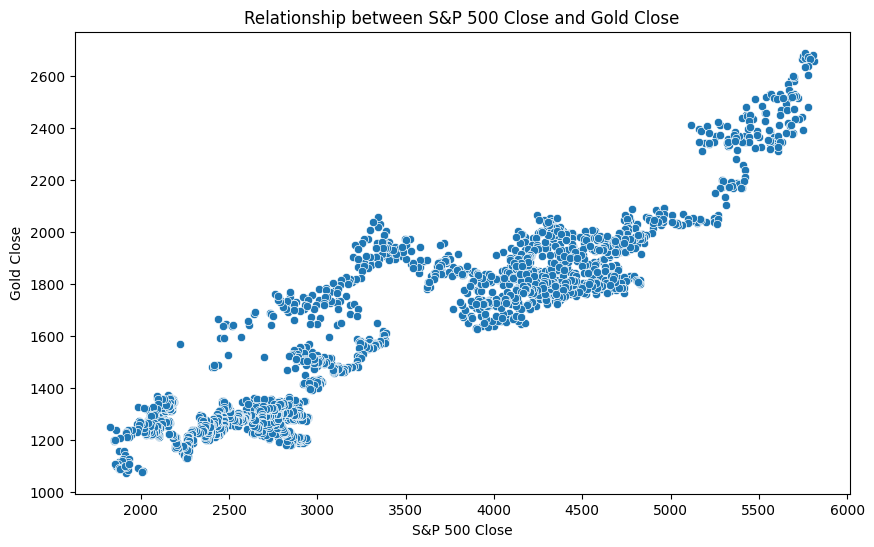

In [34]:
# Creating a scatter plot to visualize the relationship between two variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Price_gold', data=combined1_df)
plt.title('Relationship between S&P 500 Close and Gold Close')
plt.xlabel('S&P 500 Close')
plt.ylabel('Gold Close')
plt.show()



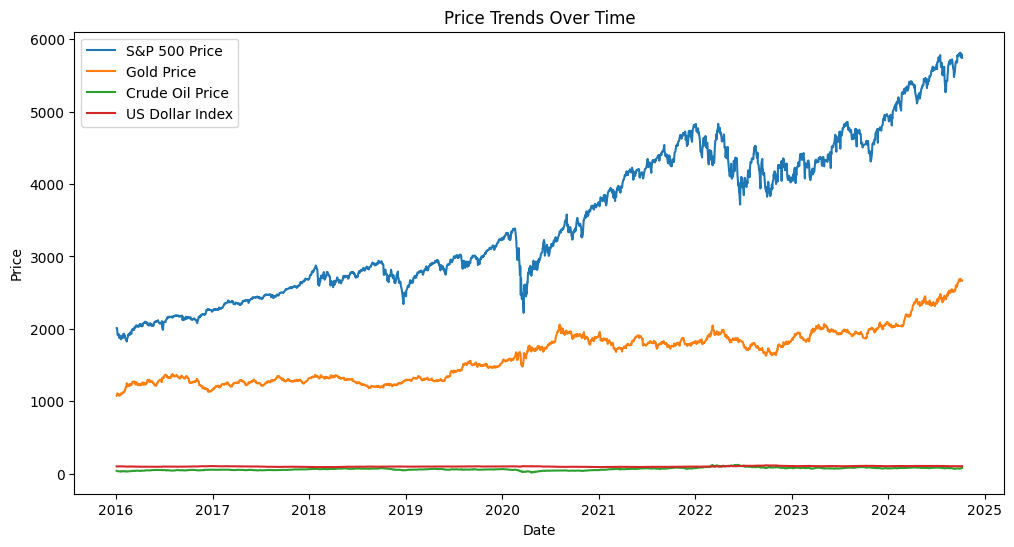

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(combined1_df.index, combined1_df['Price'], label='S&P 500 Price')
plt.plot(combined1_df.index, combined1_df['Price_gold'], label='Gold Price')
plt.plot(combined1_df.index, combined1_df['Price_crudeoil'], label='Crude Oil Price')
plt.plot(combined1_df.index, combined1_df['Price_usidx'], label='US Dollar Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends Over Time')
plt.legend()
plt.show()

/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


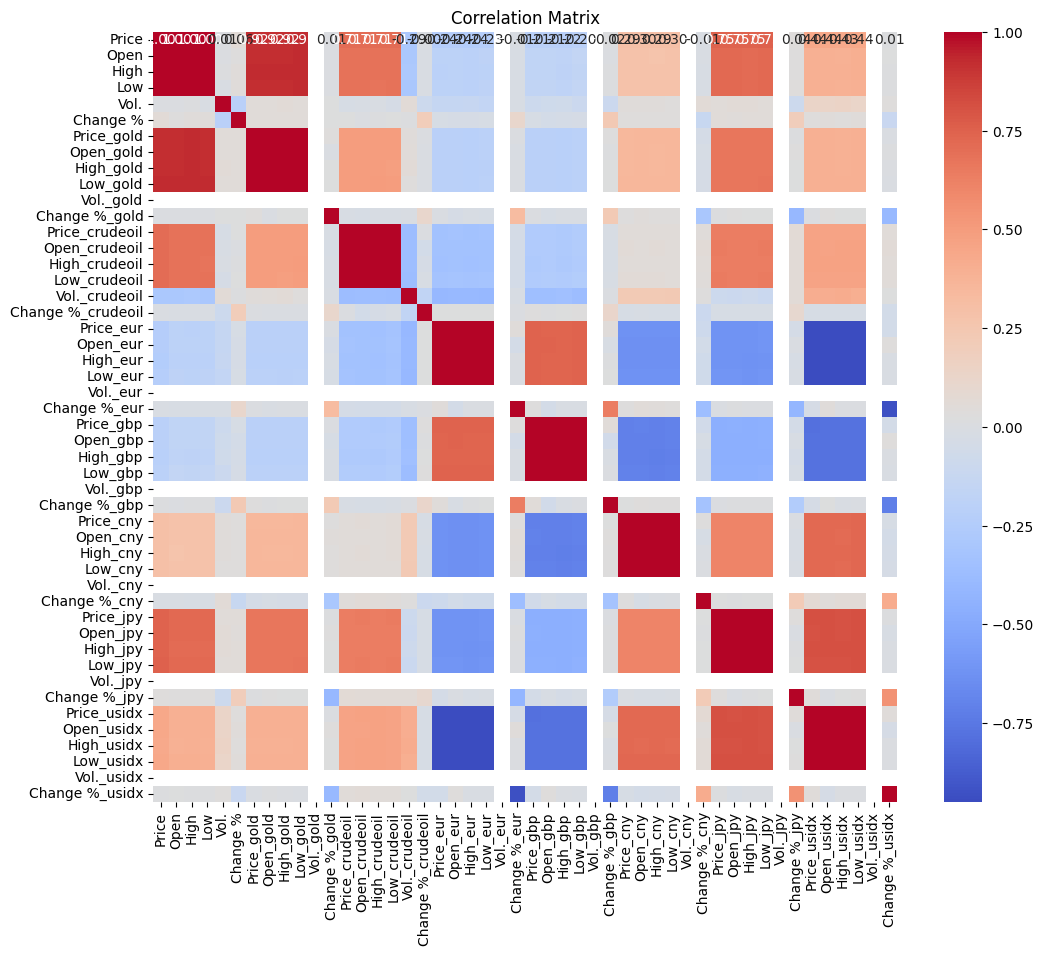

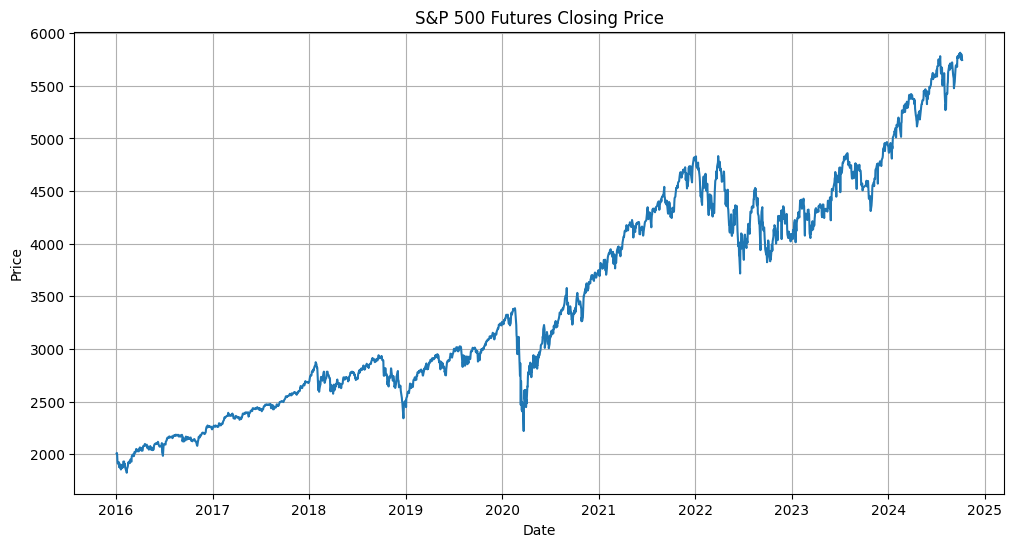

In [38]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(combined1_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Time series plot of S&P 500 closing price
plt.figure(figsize=(12, 6))
plt.plot(combined1_df.index, combined1_df['Price'])
plt.title('S&P 500 Futures Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### 3. Data cleaning and preprocessing

In [39]:
# Handling missing values (NaN) in the combined DataFrame
combined1_df.fillna(combined1_df.ffill(), inplace=True)

# Removing the duplicate rows if any
combined1_df.drop_duplicates(inplace=True)

# Converting the data types if necessary after filling NaN values
for col in combined1_df.columns:
    if combined1_df[col].dtype == 'object':
      try:
        combined1_df[col] = pd.to_numeric(combined1_df[col], errors='coerce')
      except:
        pass

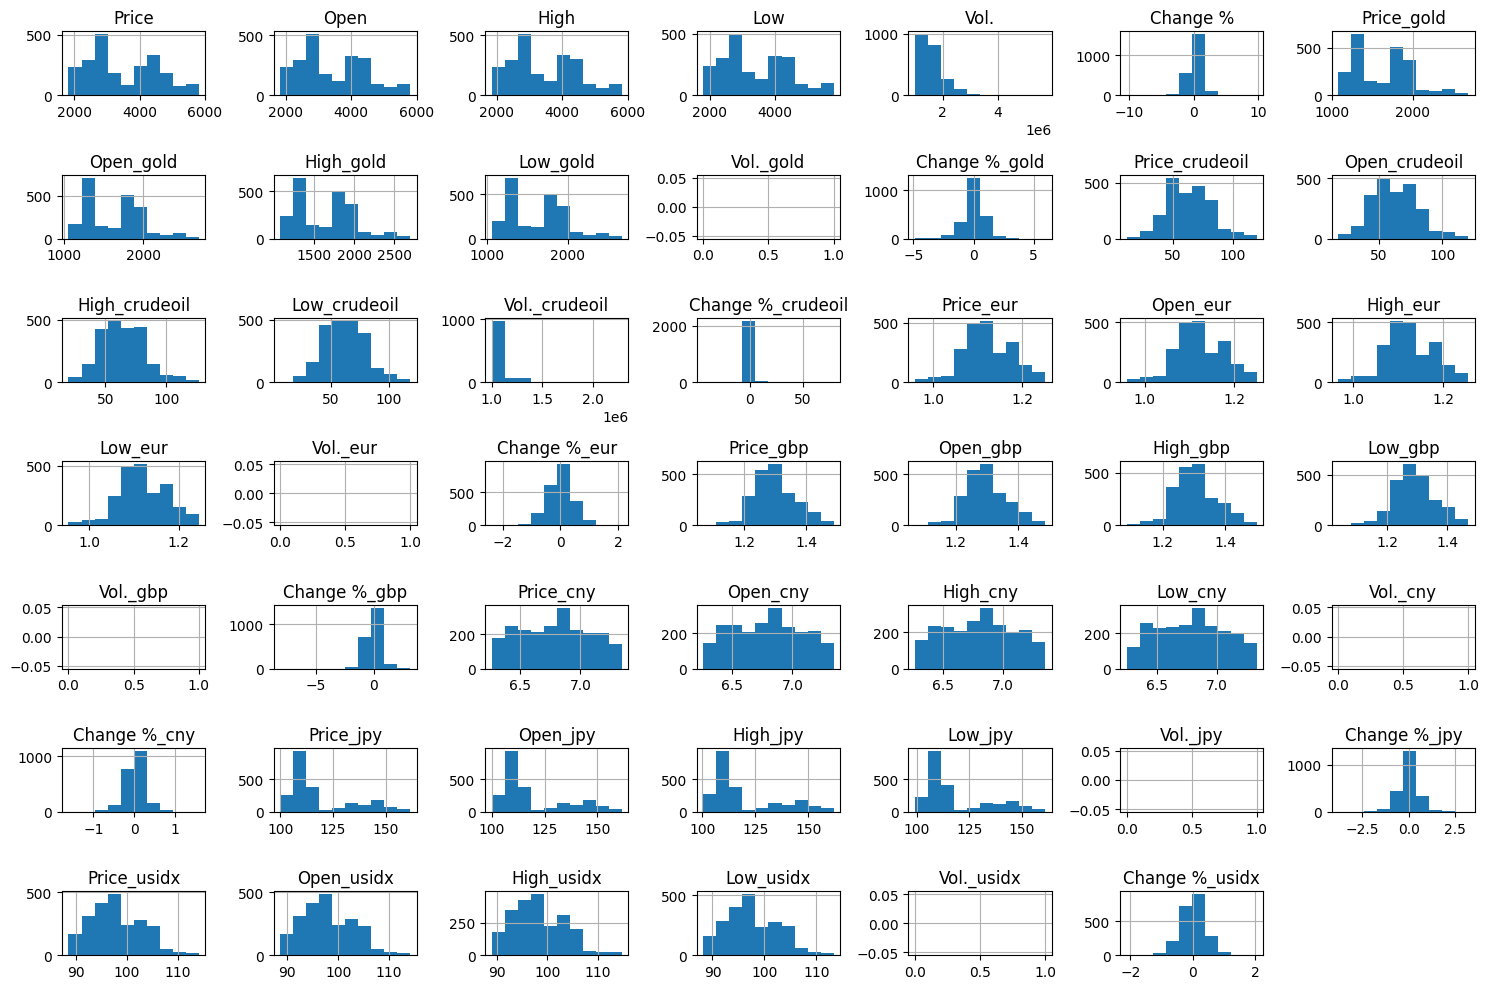

In [40]:
# Creating boxplots for each numerical column to visualize outliers
combined1_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### 4. Feature Engineering

In [41]:
# Creating lagged features
combined1_df['Price_Lag1'] = combined1_df['Price'].shift(1)
combined1_df['Volume_Lag1'] = combined1_df['Vol.'].shift(1)
combined1_df['Price_Lag7'] = combined1_df['Price'].shift(7)
combined1_df['Volume_Lag7'] = combined1_df['Vol.'].shift(7)
combined1_df['Price_Lag30'] = combined1_df['Price'].shift(30)
combined1_df['Volume_Lag30'] = combined1_df['Vol.'].shift(30)

# Calculating moving averages
combined1_df['Price_MA5'] = combined1_df['Price'].rolling(window=5).mean()
combined1_df['Price_MA10'] = combined1_df['Price'].rolling(window=10).mean()

# Creating volatility based features
combined1_df['Price_volatility_7d'] = combined1_df['Price'].rolling(window=7).std()
combined1_df['Price_volatility_30d'] = combined1_df['Price'].rolling(window=30).std()

# Calculating price ratios
combined1_df['Gold_to_SP500'] = combined1_df['Price_gold'] / combined1_df['Price']
combined1_df['DollarIndex_to_SP500'] = combined1_df['Price_usidx'] / combined1_df['Price']
combined1_df['SP500_to_Oil'] = combined1_df['Price'] / combined1_df['Price_crudeoil']
combined1_df['SP500_to_EURUSD'] = combined1_df['Price'] / combined1_df['Price_eur']
combined1_df['SP500_to_USDJPY'] = combined1_df['Price'] / combined1_df['Price_jpy']
combined1_df['Gold_to_DXY'] = combined1_df['Price_gold'] / combined1_df['Price_usidx']
combined1_df['Oil_to_DXY'] = combined1_df['Price_crudeoil'] / combined1_df['Price_usidx']

# Creating seasonal indicators
combined1_df['DayofWeek'] = combined1_df.index.dayofweek
combined1_df['Month'] = combined1_df.index.month
combined1_df['Quarter'] = combined1_df.index.quarter

In [42]:
# Calculating RSI manually
delta = combined1_df['Price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
combined1_df['RSI'] = 100 - (100 / (1 + gain / loss))

In [43]:
# Defining the parameters for MACD calculation
fast_period = 12
slow_period = 26
signal_period = 9

# Calculating the fast and slow EMAs
combined1_df['EMA_fast'] = combined1_df['Price'].ewm(span=fast_period, adjust=False).mean()
combined1_df['EMA_slow'] = combined1_df['Price'].ewm(span=slow_period, adjust=False).mean()

# Calculating the MACD line
combined1_df['MACD'] = combined1_df['EMA_fast'] - combined1_df['EMA_slow']

# Calculating the Signal line
combined1_df['MACD_signal'] = combined1_df['MACD'].ewm(span=signal_period, adjust=False).mean()

In [44]:
bin_df=combined1_df.copy()

In [45]:
# Creating 'Binary Movement' column
bin_df['Binary Movement'] = 0  # Initializing the column with 0s
bin_df.loc[bin_df['Price'].diff() > 0, 'Binary Movement'] = 1  # Assigning 1 where price increased
bin_df.loc[bin_df['Price'].diff() < 0, 'Binary Movement'] = -1  # Assigning -1 where price decreased

In [46]:
# Dropping columns with NaN values only if they contain all NaNs:
bin_df = bin_df.dropna(axis=1, how='all')

In [47]:
# Filling NaN values using forward fill for all columns
bin_df.fillna(bin_df.ffill(), inplace=True)

In [48]:
# Filling with a specific value
bin_df.fillna(bin_df.mean(), inplace=True)

# Verifying that there are no more null values
print(bin_df.isnull().sum())

Price              0
Open               0
High               0
Low                0
Vol.               0
                  ..
EMA_fast           0
EMA_slow           0
MACD               0
MACD_signal        0
Binary Movement    0
Length: 68, dtype: int64


Binary Movement
-1    1213
 1    1000
 0      23
Name: count, dtype: int64


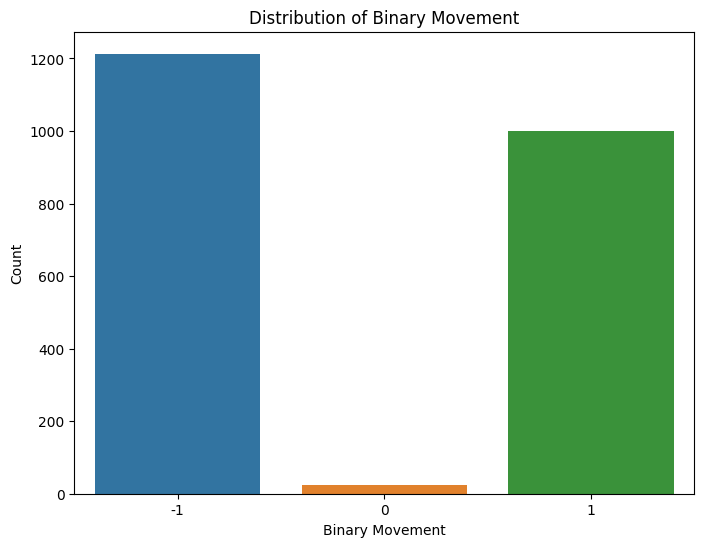

Correlation with Binary Movement:
 Binary Movement        1.000000
Volume_Lag1            0.218425
RSI                    0.186801
Volume_Lag7            0.079899
Price_volatility_7d    0.072561
                         ...   
Change %_gbp          -0.039187
Open_eur              -0.056225
High_eur              -0.056860
Low_eur               -0.058436
Price_eur             -0.058596
Name: Binary Movement, Length: 68, dtype: float64

Highly Correlated Features:
 Binary Movement    1.000000
Volume_Lag1        0.218425
RSI                0.186801
Name: Binary Movement, dtype: float64


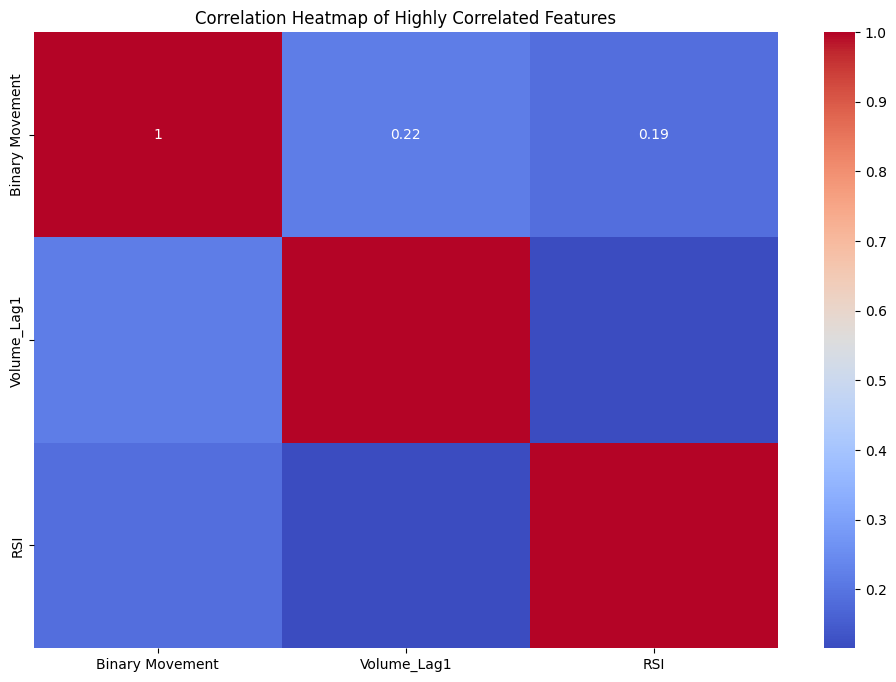

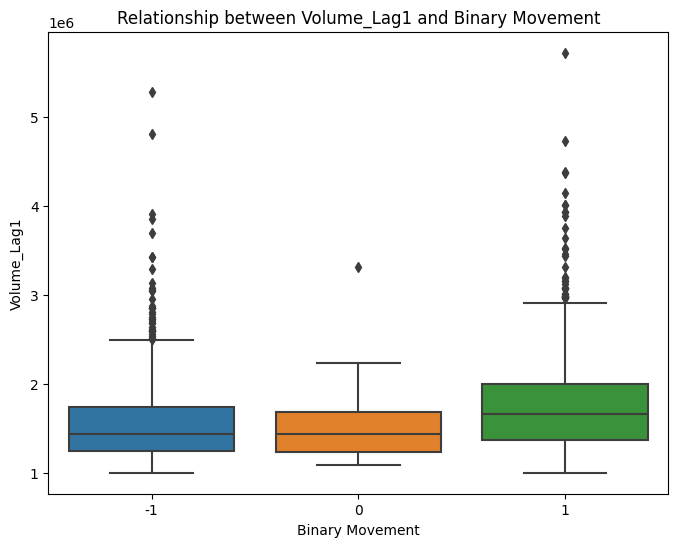

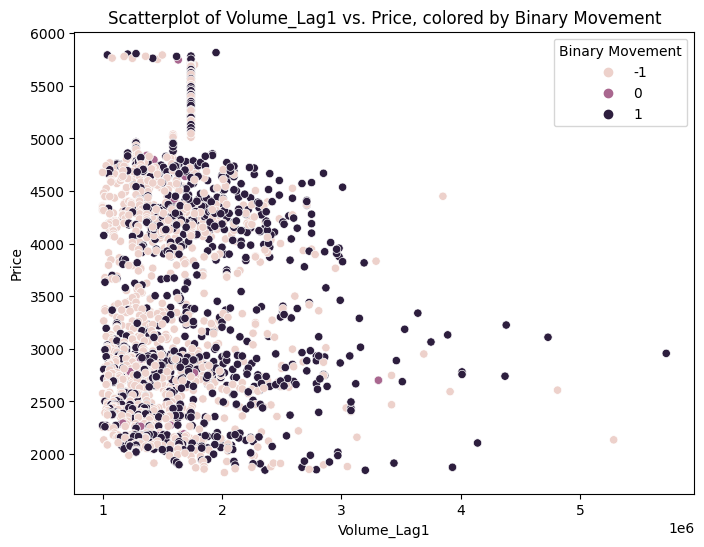

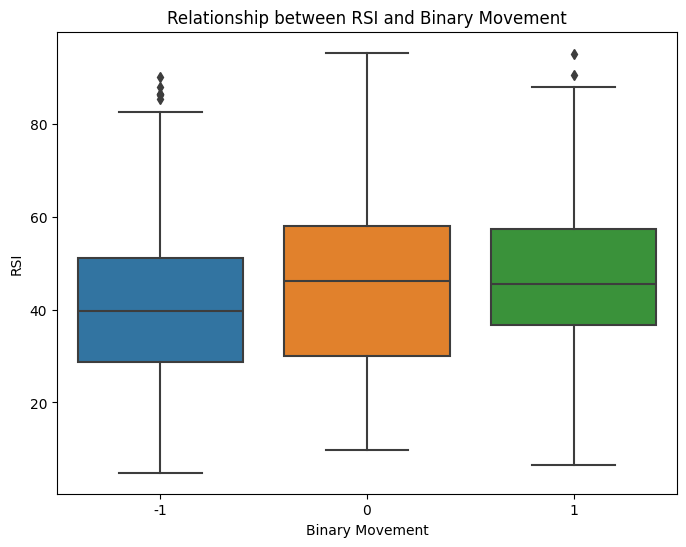

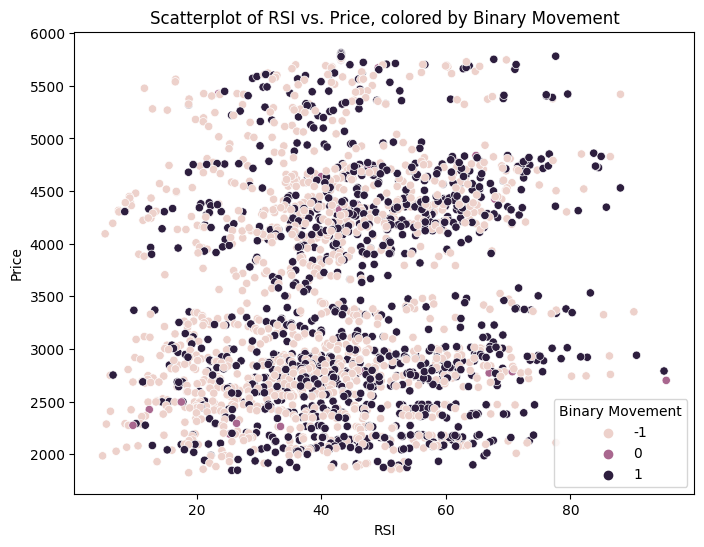

In [49]:
# Analyzing the distribution of the 'Binary Movement' column
print(bin_df['Binary Movement'].value_counts())

# Visualizing the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Binary Movement', data=bin_df)
plt.title('Distribution of Binary Movement')
plt.xlabel('Binary Movement')
plt.ylabel('Count')
plt.show()

# Correlation analysis with 'Binary Movement'
correlation_with_movement = bin_df.corr()['Binary Movement'].sort_values(ascending=False)
print("Correlation with Binary Movement:\n", correlation_with_movement)

# Identifying the highly correlated features
high_correlation_threshold = 0.1  # Adjust as needed
highly_correlated_features = correlation_with_movement[abs(correlation_with_movement) > high_correlation_threshold]
print("\nHighly Correlated Features:\n", highly_correlated_features)

# Visualizing correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bin_df[highly_correlated_features.index].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Highly Correlated Features')
plt.show()

# Exploring the relationship between highly correlated features and 'Binary Movement'
for feature in highly_correlated_features.index:
    if feature != 'Binary Movement':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Binary Movement', y=feature, data=bin_df)
        plt.title(f'Relationship between {feature} and Binary Movement')
        plt.xlabel('Binary Movement')
        plt.ylabel(feature)
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=feature, y='Price', hue='Binary Movement', data=bin_df)
        plt.title(f'Scatterplot of {feature} vs. Price, colored by Binary Movement')
        plt.show()

In [50]:
bin_2df = bin_df.copy()
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Selecting numerical features to scale
numerical_features = bin_2df.select_dtypes(include=['number']).drop('Binary Movement', axis=1).columns

# Fitting and transforming the selected features
bin_2df[numerical_features] = scaler.fit_transform(bin_2df[numerical_features])

print(bin_2df.head())

               Price      Open      High       Low      Vol.  Change %  \
Date                                                                     
2024-10-07  0.982580  0.998744  0.994476  0.988001  0.044492  0.467294   
2024-10-04  0.996428  0.984610  0.993660  0.989697  0.097458  0.557978   
2024-10-03  0.983771  0.990577  0.985626  0.985865  0.088983  0.504955   
2024-10-02  0.986465  0.988253  0.985751  0.985425  0.052966  0.514866   
2024-10-01  0.986340  1.000000  0.998117  0.987687  0.201271  0.467790   

            Price_gold  Open_gold  High_gold  Low_gold  ...  Oil_to_DXY  \
Date                                                    ...               
2024-10-07    0.984969   0.985676   0.989043  0.994517  ...    0.577011   
2024-10-04    0.986083   0.988124   0.996100  0.990966  ...    0.552233   
2024-10-03    0.993134   0.990695   0.991643  0.994829  ...    0.551074   
2024-10-02    0.987258   0.993572   0.992510  0.997508  ...    0.521748   
2024-10-01    1.000000   0.9761

In [52]:
# Sorting the DataFrame by Date in ascending order
bin2_df = bin_2df.sort_index()

# Displaying the updated DataFrame
print(bin_2df[['Binary Movement']].tail())

            Binary Movement
Date                       
2016-01-08               -1
2016-01-07                1
2016-01-06                1
2016-01-05                1
2016-01-04               -1


In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Ensuring no missing values in the dataset
bin_2df = bin_2df.dropna().reset_index(drop=True)

# Separating the features and target variable
X = bin_2df.drop(['Binary Movement','Price','Change %','Change %_gold','Change %_crudeoil','Change %_eur','Change %_gbp',
                 'Change %_cny','Change %_jpy','Change %_usidx',
                 ], axis=1)
y = bin_2df['Binary Movement']

# Verifying the alignment
print("Feature Shape (X):", X.shape)
print("Target Shape (y):", y.shape)

# Creating a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Using SelectFromModel to select features based on importance
selector = SelectFromModel(rf_classifier, threshold='median')
X_new = selector.fit_transform(X, y)

# Getting the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Printing selected features for reference
print("Selected features:", list(selected_features))

# Creating a new DataFrame with selected features and target variable
bin_df_selected = pd.DataFrame(X_new, columns=selected_features)
bin_df_selected['Binary Movement'] = y.reset_index(drop=True)

# Verifying the new DataFrame
print("Shape of bin_df_selected:", bin_df_selected.shape)
print(bin_df_selected.head())

Feature Shape (X): (2236, 58)
Target Shape (y): (2236,)
Selected features: ['Low', 'Vol.', 'Price_gold', 'Open_crudeoil', 'Open_eur', 'Price_gbp', 'High_gbp', 'Low_gbp', 'High_cny', 'Low_cny', 'Price_jpy', 'High_jpy', 'Price_Lag1', 'Volume_Lag1', 'Volume_Lag7', 'Price_Lag30', 'Volume_Lag30', 'Price_volatility_7d', 'Price_volatility_30d', 'Gold_to_SP500', 'DollarIndex_to_SP500', 'SP500_to_Oil', 'SP500_to_EURUSD', 'SP500_to_USDJPY', 'Gold_to_DXY', 'Oil_to_DXY', 'RSI', 'MACD', 'MACD_signal']
Shape of bin_df_selected: (2236, 30)
        Low      Vol.  Price_gold  Open_crudeoil  Open_eur  Price_gbp  \
0  0.988001  0.044492    0.984969       0.543108  0.473937   0.571871   
1  0.989697  0.097458    0.986083       0.539113  0.493484   0.579738   
2  0.985865  0.088983    0.993134       0.511252  0.497942   0.581645   
3  0.985425  0.052966    0.987258       0.509401  0.505830   0.615733   
4  0.987687  0.201271    1.000000       0.487482  0.528807   0.620024   

   High_gbp   Low_gbp  High_cn

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Selecting numerical features to scale
numerical_features = bin_df_selected.select_dtypes(include=['number']).drop('Binary Movement', axis=1).columns

# Fitting and transforming the selected features
bin_df_selected[numerical_features] = scaler.fit_transform(bin_df_selected[numerical_features])

print(bin_df_selected.head())

       Vol.  Open_crudeoil  High_crudeoil  Open_eur  Open_gbp  High_gbp  \
0  0.044492       0.543108       0.534283  0.473937  0.576960  0.549020   
1  0.097458       0.539113       0.516860  0.493484  0.581979  0.558584   
2  0.088983       0.511252       0.504402  0.497942  0.616396  0.582496   
3  0.052966       0.509401       0.489790  0.505830  0.620459  0.589909   
4  0.201271       0.487482       0.484264  0.528807  0.641013  0.609995   

    Low_gbp  Open_cny  High_cny   Low_cny  ...  Volume_Lag30  Gold_to_SP500  \
0  0.619268  0.700619  0.692265  0.709322  ...      0.131769       0.273330   
1  0.621584  0.700619  0.692265  0.709322  ...      0.131769       0.261041   
2  0.626911  0.700619  0.692265  0.709322  ...      0.131769       0.279047   
3  0.662575  0.700619  0.692265  0.709322  ...      0.131769       0.271517   
4  0.660491  0.700619  0.692265  0.709322  ...      0.131769       0.282330   

   SP500_to_Oil  SP500_to_USDJPY  Gold_to_DXY  Oil_to_DXY       RSI      M

In [58]:
# Sorting data chronologically and splitting the data to get the desired results
bin_df_selected = bin_df_selected.sort_index()
train_size = int(0.7 * len(bin_df_selected))
X_train = bin_df_selected.iloc[:train_size].drop('Binary Movement', axis=1)
y_train = bin_df_selected.iloc[:train_size]['Binary Movement']
X_test = bin_df_selected.iloc[train_size:].drop('Binary Movement', axis=1)
y_test = bin_df_selected.iloc[train_size:]['Binary Movement']

### 5. Model Selection and Training

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Separating features (X) and the target variable (y)
X = bin_df_selected.drop('Binary Movement', axis=1)
y = bin_df_selected['Binary Movement']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Defining the models with basic hyperparameters
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, C=1, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', probability=True)
}

# Storing results
results = []

for model_name, model in models.items():

    # Creating a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fitting the model on training data
    pipeline.fit(X_train, y_train)

    # Evaluating on the training data
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Evaluating on the testing data
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Storing the results
    results.append({
        'Model': model_name,
        'Train Accuracy': round(train_accuracy, 4),
        'Train F1': round(train_f1, 4),
        'Train Precision': round(train_precision, 4),
        'Train Recall': round(train_recall, 4),
        'Test Accuracy': round(test_accuracy, 4),
        'Test F1': round(test_f1, 4),
        'Test Precision': round(test_precision, 4),
        'Test Recall': round(test_recall, 4)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Printing the results
print("Model Evaluation Results:")
print(results_df)

# Sorting by Test Accuracy
print("\nSorted by Test Accuracy:")
print(results_df.sort_values(by="Test Accuracy", ascending=False))


Model Evaluation Results:
                 Model  Train Accuracy  Train F1  Train Precision  \
0  Logistic Regression          0.6875    0.7053           0.7322   
1        Decision Tree          0.8300    0.8246           0.8238   
2        Random Forest          0.9061    0.9006           0.9040   
3    Gradient Boosting          0.9412    0.9409           0.9430   
4                  SVM          0.6371    0.6509           0.6740   

   Train Recall  Test Accuracy  Test F1  Test Precision  Test Recall  
0        0.6875         0.6572   0.6813          0.7167       0.6572  
1        0.8300         0.5708   0.5662          0.5627       0.5708  
2        0.9061         0.6066   0.5996          0.5972       0.6066  
3        0.9412         0.6393   0.6357          0.6347       0.6393  
4        0.6371         0.5380   0.5599          0.5921       0.5380  

Sorted by Test Accuracy:
                 Model  Train Accuracy  Train F1  Train Precision  \
0  Logistic Regression          0.6875

#### Here, the Logistic Regression and SVM model seems to work better as compared to the other models. Next, we will try to use the best parameters to get the best out of each model using hyperparameter tuning.

### 6. Hyperparameter Tuning

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Scaling the data to standardize it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model on training and test sets
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training set evaluation
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Test set evaluation
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_classification_report = classification_report(y_test, y_test_pred)

    return {
        'train_accuracy': train_accuracy,
        'train_f1': train_f1,
        'train_precision': train_precision,
        'train_recall': train_recall,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_classification_report': test_classification_report
    }

# Defining models and hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Training and evaluating models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Using GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Using scaled data for all models for consistency
    grid_search.fit(X_train_scaled, y_train)
    evaluation_results = evaluate_model(
        grid_search.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)

    # Storing the results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        **evaluation_results
    }

    print(f"\n{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"Train Accuracy: {evaluation_results['train_accuracy']:.4f}, Test Accuracy: {evaluation_results['test_accuracy']:.4f}")
    print(f"Train F1: {evaluation_results['train_f1']:.4f}, Test F1: {evaluation_results['test_f1']:.4f}")
    print(f"Train Precision: {evaluation_results['train_precision']:.4f}, Test Precision: {evaluation_results['test_precision']:.4f}")
    print(f"Train Recall: {evaluation_results['train_recall']:.4f}, Test Recall: {evaluation_results['test_recall']:.4f}")
    print("Classification Report for Test Set:")
    print(evaluation_results['test_classification_report'])
    print("-" * 40)

# Identifying the best model based on test accuracy
best_model_name = max(results, key=lambda k: results[k]['test_accuracy'])
print(f"\nBest Model: {best_model_name}")
print(f"Train Accuracy: {results[best_model_name]['train_accuracy']:.4f}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
print(f"F1 Score: {results[best_model_name]['test_f1']:.4f}")
print(f"Precision: {results[best_model_name]['test_precision']:.4f}")
print(f"Recall: {results[best_model_name]['test_recall']:.4f}")
print(f"Best Parameters: {results[best_model_name]['best_params']}")


Training Logistic Regression...



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/Users/saiswethalakkoju/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/saiswethalakkoju/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._


Logistic Regression - Best Parameters: {'C': 10}
Train Accuracy: 0.8230, Test Accuracy: 0.7914
Train F1: 0.8174, Test F1: 0.7859
Train Precision: 0.8171, Test Precision: 0.7839
Train Recall: 0.8230, Test Recall: 0.7914
Classification Report for Test Set:
              precision    recall  f1-score   support

          -1       0.78      0.86      0.82       364
           0       0.00      0.00      0.00         7
           1       0.80      0.73      0.76       300

    accuracy                           0.79       671
   macro avg       0.53      0.53      0.53       671
weighted avg       0.78      0.79      0.79       671

----------------------------------------
Training Decision Tree...

Decision Tree - Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Train Accuracy: 0.6927, Test Accuracy: 0.5872
Train F1: 0.6818, Test F1: 0.5760
Train Precision: 0.6905, Test Precision: 0.5765
Train Recall: 0.6927, Test Recall: 0.5872
Classification Report for Test Set:
              